In [1]:
import numpy             as     np
import matplotlib        as     mpl
import matplotlib.pyplot as     plt
from   matplotlib        import rc
from   cycler            import cycler

_widths = {
    # a4paper columnwidth = 426.79135 pt = 5.93 in
    # letterpaper columnwidth = 443.57848 pt = 6.16 in
    'onecolumn': {
        'a4paper' : 5.93,
        'letterpaper' : 6.16
    },
    # a4paper columnwidth = 231.84843 pt = 3.22 in
    # letterpaper columnwidth = 240.24199 pt = 3.34 in
    'twocolumn': {
        'a4paper' : 3.22,
        'letterpaper' : 3.34
    }
}

_wide_widths = {
    # a4paper wide columnwidth = 426.79135 pt = 5.93 in
    # letterpaper wide columnwidth = 443.57848 pt = 6.16 in
    'onecolumn': {
        'a4paper' : 5.93,
        'letterpaper' : 6.16
    },
    # a4paper wide linewidth = 483.69687 pt = 6.72 in
    # letterpaper wide linewidth = 500.48400 pt = 6.95 in
    'twocolumn': {
        'a4paper' : 6.72,
        'letterpaper' : 6.95
    }
}

_fontsizes = {
    10 : {
        'tiny' : 5,
        'scriptsize' : 7,
        'footnotesize' : 8, 
        'small' : 9, 
        'normalsize' : 10,
        'large' : 12, 
        'Large' : 14, 
        'LARGE' : 17,
        'huge' : 20,
        'Huge' : 25
    },
    11 : {
        'tiny' : 6,
        'scriptsize' : 8,
        'footnotesize' : 9, 
        'small' : 10, 
        'normalsize' : 11,
        'large' : 12, 
        'Large' : 14, 
        'LARGE' : 17,
        'huge' :  20,
        'Huge' :  25
    },
    12 : {
        'tiny' : 6,
        'scriptsize' : 8,
        'footnotesize' : 10, 
        'small' : 11, 
        'normalsize' : 12,
        'large' : 14, 
        'Large' : 17, 
        'LARGE' : 20,
        'huge' :  25,
        'Huge' :  25
    }
}

_width         = 1
_wide_width    = 1
_quantumviolet = '#53257F'
_quantumgray   = '#555555'

# Sets up the plot with the fitting arguments so that the font sizes of the plot
# and the font sizes of the document are well aligned
#
#     columns : string = ('onecolumn' | 'twocolumn')
#         the columns you used to set up your quantumarticle, 
#         defaults to 'twocolumn'
#
#     paper : string = ('a4paper' | 'letterpaper')
#         the paper size you used to set up your quantumarticle,
#         defaults to 'a4paper'
#
#     fontsize : int = (10 | 11 | 12)
#         the fontsize you used to set up your quantumarticle as int
#
#     (returns) : dict
#         parameters that can be used for plot adjustments

def global_setup(columns = 'twocolumn', paper = 'a4paper', fontsize = 10):
    plt.rcdefaults()
        
    # Seaborn white is a good base style
    plt.style.use(['seaborn-white', './quantum-plots.mplstyle'])
    
    try:        
        # This hackery is necessary so that jupyther shows the plots
        mpl.use("pgf")
        %matplotlib inline
        plt.plot()
        mpl.use("pgf")
    except:
        print('Call to matplotlib.use had no effect')
        
    mpl.interactive(False) 
    
    # Now prepare the styling that depends on the settings of the document
    
    global _width 
    _width = _widths[columns][paper]
    
    global _wide_width 
    _wide_width = _wide_widths[columns][paper]
    
    # Use the default fontsize scaling of LaTeX
    global _fontsizes
    fontsizes = _fontsizes[fontsize]
    
    plt.rcParams['axes.labelsize'] = fontsizes['small']
    plt.rcParams['axes.titlesize'] = fontsizes['large']
    plt.rcParams['xtick.labelsize'] = fontsizes['footnotesize']
    plt.rcParams['ytick.labelsize'] = fontsizes['footnotesize']
    plt.rcParams['font.size'] = fontsizes['small']
    
    return {
            'fontsizes' : fontsizes,
            'colors' : {
                'quantumviolet' : _quantumviolet,
                'quantumgray' : _quantumgray
            }
        }
    

# Sets up the plot with the fitting arguments so that the font sizes of the plot
# and the font sizes of the document are well aligned
#
#     aspect_ratio : float
#         the aspect ratio (width/height) of your plot
#         defaults to the golden ratio
#
#     width_ratio : float in [0, 1]
#         the width of your plot when you insert it into the document, e.g.
#         .8 of the regular width
#         defaults to 1.0
#
#     wide : bool 
#         indicates if the figures spans two columns in twocolumn mode, i.e.
#         when the figure* environment is used, has no effect in onecolumn mode 
#         defaults to False
#
#     (returns) : matplotlib figure object
#         the initialized figure object

def plot_setup(aspect_ratio = 1/1.62, width_ratio = 1.0, wide = False):
    width = (_wide_width if wide else _width) * width_ratio
    height = width * aspect_ratio
           
    return plt.figure(figsize=(width,height), dpi=120, facecolor='white')
    
print('Setup methods loaded')

Setup methods loaded


In [2]:
props = global_setup(columns = 'onecolumn', paper = 'a4paper', fontsize = 11)

print('Global props:')
for key in props:
    print(key, ':')
    for subkey in props[key]:
        print('    ', subkey, ': ', props[key][subkey])

Global props:
fontsizes :
     tiny :  6
     scriptsize :  8
     footnotesize :  9
     small :  10
     normalsize :  11
     large :  12
     Large :  14
     LARGE :  17
     huge :  20
     Huge :  25
colors :
     quantumviolet :  #53257F
     quantumgray :  #555555


In [3]:
mus = np.linspace(2/9,0.333,500)

In [4]:
def lmbdas(mu):
    return (2+9*mu)/(18*mu)

In [5]:
lmbds = lmbdas(mus)
lmax = np.ones(len(mus))

In [6]:
lmin = np.ones(len(mus))*lmbds[-1]

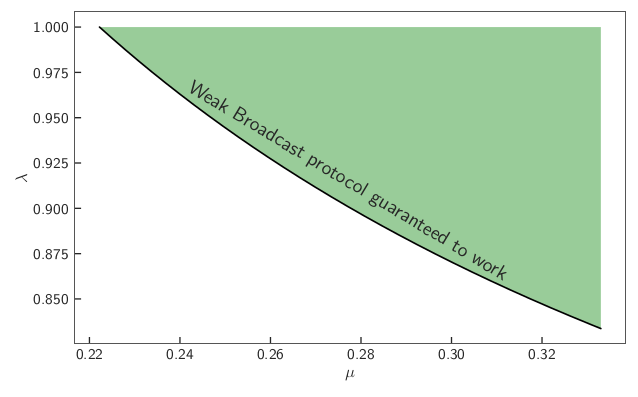

In [9]:
fig = plot_setup()
plt.plot(mus, lmbds,color="black")

plt.fill_between(mus,lmbds,lmax,where = ( lmax > lmbds ), facecolor = "green", alpha = 0.4)
plt.ylabel(r"$\lambda$")
plt.xlabel(r"$\mu$")

th1 = plt.text(0.2415, 0.965, 'Weak Broadcast protocol guaranteed to work', fontsize=12,
               rotation=-31, rotation_mode='anchor')


plt.savefig("../figures/completecondition_v4.pdf", dpi = 1500, bbox_inches='tight')